In [10]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Load data and features names

In [11]:
# load data
path_data = '../Data/'

#list of all data names
city_data = ['jc_listings','jc_locale',
             'nyc_listings','nyc_locale',
             'rio_listings','rio_locale']
                   
dfs = {}

# loop to load all the data with respective name
for city in city_data:
    dfs[city] = pd.read_pickle(path_data+city+'.pkl')    
    
for key,val in dfs.items():
    exec(key + '=val')

In [12]:
# delete dfs dictionary to free memory
del dfs

In [13]:
features = ['neighbourhood_cleansed', 'latitude','longitude','room_type','bedrooms', 'beds',
            'accommodates', 'review_scores_rating', 'review_scores_cleanliness',
            'review_scores_location', 'review_scores_value']

# Preprocesses Data

Selecting the features

In [14]:
# Jersey City data

jc_features = jc_listings[features]
jc_target = jc_listings.price

jc_features.info() , jc_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2565
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood_cleansed     2028 non-null   object 
 1   latitude                   2028 non-null   float64
 2   longitude                  2028 non-null   float64
 3   room_type                  2028 non-null   object 
 4   bedrooms                   1858 non-null   float64
 5   beds                       1973 non-null   float64
 6   accommodates               2028 non-null   int64  
 7   review_scores_rating       1708 non-null   float64
 8   review_scores_cleanliness  1706 non-null   float64
 9   review_scores_location     1706 non-null   float64
 10  review_scores_value        1706 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 190.1+ KB
<class 'pandas.core.series.Series'>
Int64Index: 2028 entries, 0 to 2565
Series name: price
Non-Null C

(None, None)

In [15]:
# Rio data

rio_features = rio_listings[features]
rio_target = rio_listings.price

rio_features.info(), rio_target.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 26365
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood_cleansed     23248 non-null  object 
 1   latitude                   23248 non-null  float64
 2   longitude                  23248 non-null  float64
 3   room_type                  23248 non-null  object 
 4   bedrooms                   22119 non-null  float64
 5   beds                       23068 non-null  float64
 6   accommodates               23248 non-null  int64  
 7   review_scores_rating       17147 non-null  float64
 8   review_scores_cleanliness  16973 non-null  float64
 9   review_scores_location     16973 non-null  float64
 10  review_scores_value        16973 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.1+ MB


(None,
 <bound method Series.info of 0        3500.0
 1        5000.0
 2         681.0
 3        8999.0
 4         500.0
           ...  
 26361     115.0
 26362     149.0
 26363      60.0
 26364     320.0
 26365     657.0
 Name: price, Length: 23248, dtype: float64>)

In [16]:
# New York City data

nyc_features = nyc_listings[features]
nyc_target = nyc_listings.price

nyc_features.info(), nyc_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22618 entries, 0 to 39879
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood_cleansed     22618 non-null  object 
 1   latitude                   22618 non-null  float64
 2   longitude                  22618 non-null  float64
 3   room_type                  22618 non-null  object 
 4   bedrooms                   20569 non-null  float64
 5   beds                       22156 non-null  float64
 6   accommodates               22618 non-null  int64  
 7   review_scores_rating       19108 non-null  float64
 8   review_scores_cleanliness  19083 non-null  float64
 9   review_scores_location     19083 non-null  float64
 10  review_scores_value        19083 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.1+ MB
<class 'pandas.core.series.Series'>
Int64Index: 22618 entries, 0 to 39879
Series name: price
Non-Null

(None, None)

Processing pipeline for numeric and categorical data

In [17]:
# Data Processing Pipeline

num_atributes = ['latitude','longitude', 'bedrooms', 'beds',
            'accommodates', 'review_scores_rating', 'review_scores_cleanliness',
            'review_scores_location', 'review_scores_value']

cat_atributes = ['neighbourhood_cleansed', 'room_type']

num_steps = [("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), 
            ("scaler", StandardScaler())]

cat_steps = [("one_hot", OneHotEncoder(handle_unknown= 'ignore'))]

# data pipeline

num_pipeline = Pipeline(num_steps)
cat_pipeline = Pipeline(cat_steps)

preprocessor = ColumnTransformer([
                ("num", num_pipeline, num_atributes),
                ("cat", cat_pipeline, cat_atributes)])


# Jersey City

## Train test split and Base Models fit

In [28]:
# train test split
# JC

X = jc_features
y = np.log(jc_target)

jc_X_train,jc_X_test,jc_y_train,jc_y_test = train_test_split(X,y, test_size=0.3, random_state=27)

In [29]:
# Models fit

pipe_1 = Pipeline(steps = [("preprocess",preprocessor),("model", Lasso(alpha=.1))])
pipe_2 = Pipeline(steps = [("preprocess",preprocessor),("model", LinearRegression())])
pipe_3 = Pipeline(steps = [("preprocess",preprocessor),("model", RandomForestRegressor())])
pipe_4 = Pipeline(steps = [("preprocess",preprocessor),("model", xgb.XGBRegressor(eval_metric = 'rmse'))])

jc_Lasso = pipe_1.fit(jc_X_train, jc_y_train)
jc_LR = pipe_2.fit(jc_X_train, jc_y_train)
jc_RFR = pipe_3.fit(jc_X_train, jc_y_train)
jc_XGB = pipe_4.fit(jc_X_train, jc_y_train)



# Models Evaluation

In [426]:
# Model valuation

model_score = [jc_Lasso.score(jc_X_test, jc_y_test), 
               jc_LR.score(jc_X_test, jc_y_test), 
               jc_RFR.score(jc_X_test, jc_y_test),
               jc_XGB.score(jc_X_test, jc_y_test)]

predictions = (pipe_1.predict(jc_X_test), pipe_2.predict(jc_X_test), pipe_3.predict(jc_X_test),  pipe_4.predict(jc_X_test))

jc_rmse = []
for pred in predictions:
    jc_rmse.append(np.sqrt(mean_squared_error(np.exp(jc_y_test),np.exp(pred))))


In [427]:
print(model_score, '\n',jc_rmse)

[0.5477949585905698, 0.6351097381033965, 0.7505826186448199, 0.7369438567703941] 
 [302.2103659249311, 263.3429525934947, 224.30621776018404, 220.85283044485166]


Best models are Random Forest Regressor and XGB; We will optimize these two models

# Grid search and cross validation

In [30]:
# XGB GridSearchCV
xgb_params = {'model__n_estimators': range(50,250,25),
              'model__max_depth' : range(2,10,1),
              "model__min_child_weight":range(1, 5,1),
              'model__learning_rate': [0.1, 0.01]}

xgb_grid = GridSearchCV(estimator = pipe_4,
                        param_grid = xgb_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

xgb_grid.fit(jc_X_train, jc_y_train)

jc_xgb_grid = xgb_grid.best_estimator_

In [32]:
jc_model = xgb_grid

In [34]:
print(xgb_grid.best_params_, '\n', xgb_grid.best_score_)

{'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__min_child_weight': 4, 'model__n_estimators': 150} 
 -0.15875810827216283


In [387]:
# Random Forest GridSearchCV

rfr_params = {'model__n_estimators': range(50,250,25),
              'model__max_features': ['sqrt', 'log2', None],
              'model__max_depth' : range(2,10,1),
              'model__min_samples_split' : range(2,10,1)}

rfr_grid = GridSearchCV(estimator = pipe_3,
                        param_grid = rfr_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

rfr_grid.fit(jc_X_train, jc_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'bedrooms',
                                                                          'beds',
                                                                     

In [388]:
print(rfr_grid.best_params_, '\n', rfr_grid.best_score_)

{'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_split': 7, 'model__n_estimators': 75} 
 -0.16399165516925676


# Rio

## Train test split and Base Models fit

In [217]:
# train test split
# Rio

X = rio_features
y = np.log(rio_target)

rio_X_train,rio_X_test,rio_y_train,rio_y_test = train_test_split(X,y, test_size=0.3, random_state=27)

In [39]:
# Model fit

rio_Lasso = pipe_1.fit(rio_X_train, rio_y_train)
rio_LR = pipe_2.fit(rio_X_train, rio_y_train)
rio_RFR = pipe_3.fit(rio_X_train, rio_y_train)
rio_XGB = pipe_4.fit(rio_X_train, rio_y_train)

## Madels Evaluation

In [433]:
# Model valuation

model_score = [rio_Lasso.score(rio_X_test, rio_y_test), 
               rio_LR.score(rio_X_test, rio_y_test), 
               rio_RFR.score(rio_X_test, rio_y_test),
               rio_XGB.score(rio_X_test, rio_y_test)]

predictions = (pipe_1.predict(rio_X_test), pipe_2.predict(rio_X_test), pipe_3.predict(rio_X_test),  pipe_4.predict(rio_X_test))

rio_rmse = []
for pred in predictions:
    rio_rmse.append(np.sqrt(mean_squared_error(np.exp(rio_y_test),np.exp(pred))))

In [434]:
print(model_score, '\n',rio_rmse)

[0.31063110930823756, 0.3847420931339789, 0.5159466668490591, 0.5467374553953794] 
 [61670.36993046871, 456646.03195124416, 898.5844133169879, 895.731505013148]


Best models are Random Forest Regressor and XGB; We will optimize these two models

## Grid search and cross validation

In [218]:
# XGB GridSearchCV
xgb_params = {'model__n_estimators': range(50,250,25),
              'model__max_depth' : range(2,10,1),
              "model__min_child_weight":range(1, 5,1),
              'model__learning_rate': [0.1, 0.01]}

xgb_grid = GridSearchCV(estimator = pipe_4,
                        param_grid = xgb_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

xgb_grid.fit(rio_X_train, rio_y_train)

rio_xgb_grid = xgb_grid.best_estimator_

In [219]:
rio_model = xgb_grid

In [220]:
print(xgb_grid.best_params_, '\n', xgb_grid.best_score_)

{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 4, 'model__n_estimators': 225} 
 -0.39523579162018735


In [392]:
# Random Forest GridSearchCV

rfr_params = {'model__n_estimators': range(50,250,25),
              'model__max_features': ['sqrt', 'log2', None],
              'model__max_depth' : range(2,10,1),
              'model__min_samples_split' : range(2,10,1)}

rfr_grid = GridSearchCV(estimator = pipe_3,
                        param_grid = rfr_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

rfr_grid.fit(rio_X_train, rio_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'bedrooms',
                                                                          'beds',
                                                                     

In [393]:
print(rfr_grid.best_params_, '\n', rfr_grid.best_score_)

{'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_split': 8, 'model__n_estimators': 175} 
 -0.4203439067993762


# New York City

## Train test split and Base Models fit

In [43]:
# train test split
# NYC

X = nyc_features
y = np.log(nyc_target)

nyc_X_train,nyc_X_test,nyc_y_train,nyc_y_test = train_test_split(X,y, test_size=0.3, random_state=11)

In [395]:
# Model fit

nyc_Lasso = pipe_1.fit(nyc_X_train, nyc_y_train)
nyc_LR = pipe_2.fit(nyc_X_train, nyc_y_train)
nyc_RFR = pipe_3.fit(nyc_X_train, nyc_y_train)
nyc_XGB = pipe_4.fit(nyc_X_train, nyc_y_train)

## Models Evaluation

In [351]:
# Model valuation

model_score = [nyc_Lasso.score(nyc_X_test, nyc_y_test), 
               nyc_LR.score(nyc_X_test, nyc_y_test), 
               nyc_RFR.score(nyc_X_test, nyc_y_test),
               nyc_XGB.score(nyc_X_test, nyc_y_test)]

predictions = (pipe_1.predict(nyc_X_test), pipe_2.predict(nyc_X_test), pipe_3.predict(nyc_X_test),  pipe_4.predict(nyc_X_test))

nyc_rmse = []
for pred in predictions:
    nyc_rmse.append(np.sqrt(mean_squared_error(np.exp(nyc_y_test),np.exp(pred))))

In [352]:
print(model_score, '\n',nyc_rmse)

[0.36643840475311906, 0.6064484959655556, 0.687967085370149, 0.6743843920858883] 
 [369.67368645053665, 354.1918112749847, 335.5799557379308, 338.7298315145673]


## Grid search and cross validation

In [44]:
# Grid Search and cross validation:
# XGB GridSearchCV
xgb_params = {'model__n_estimators': range(50,250,25),
              'model__max_depth' : range(2,10,1),
              "model__min_child_weight":range(1, 5,1),
              'model__learning_rate': [0.1, 0.01]}

xgb_grid = GridSearchCV(estimator = pipe_4,
                        param_grid = xgb_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

xgb_grid.fit(nyc_X_train, nyc_y_train)

nyc_xgb_grid = xgb_grid.best_estimator_

In [183]:
nyc_model = xgb_grid

In [46]:
print(xgb_grid.best_params_, '\n', xgb_grid.best_score_)

{'model__learning_rate': 0.1, 'model__max_depth': 9, 'model__min_child_weight': 2, 'model__n_estimators': 175} 
 -0.17606517179736997


In [399]:
# Random Forest GridSearchCV

rfr_params = {'model__n_estimators': range(50,250,25),
              'model__max_features': ['sqrt', 'log2', None],
              'model__max_depth' : range(2,10,1),
              'model__min_samples_split' : range(2,10,1)}

rfr_grid = GridSearchCV(estimator = pipe_3,
                        param_grid = rfr_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

rfr_grid.fit(nyc_X_train, nyc_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'bedrooms',
                                                                          'beds',
                                                                     

In [400]:
print(rfr_grid.best_params_, '\n', rfr_grid.best_score_)

{'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_split': 7, 'model__n_estimators': 175} 
 -0.19203295852787533


XGBoosting Regression consistently out perfrom Random Forest Regression for the three case studies. Next we will build the best model for each city, measure its performance and save the model.

## Final Model Selection¶

## Model Performance

In [470]:
model_score = [round(jc_xgb_grid.score(jc_X_test, jc_y_test)*100,2), 
               round(rio_xgb_grid.score(rio_X_test, rio_y_test)*100,2), 
               round(nyc_xgb_grid.score(nyc_X_test, nyc_y_test)*100,2)]

predictions = (jc_xgb_grid.predict(jc_X_test), 
               rio_xgb_grid.predict(rio_X_test),
               nyc_xgb_grid.predict(nyc_X_test))
test_data = [jc_y_test, rio_y_test, nyc_y_test]
               
models_rmse = []
for pred, data in zip(predictions, test_data):
    models_rmse.append(np.sqrt(mean_squared_error(np.exp(data),np.exp(pred))))
    
data = {'R\u00b2': model_score, 'rmse': models_rmse}
cities = ['JC', 'Rio', 'NYC']

performance = pd.DataFrame(data,index = cities)

print(performance)

        R²        rmse
JC   75.37  220.627080
Rio  55.68  912.965461
NYC  69.16  337.548466


Grid Search hyperparameters optimization improved all XBoost models coeficient of determination. Jersey City root mean squared error (rmse) was marginaly improved while Rio and New York City were marginally worse. These results increase our confidense that the models aren't overfiting the current data. Note Rio rmse is larger than the rest because it is quoted in Brazilian Reais.

## Interpreting Model Results and Insights

Feature Importance

Jersey City

In [175]:
jc_feat = jc_model.best_estimator_.named_steps["model"].feature_importances_
cat_enc = jc_model.best_estimator_.named_steps["preprocess"].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()
jc_feat_names = np.concatenate((num_atributes, cat_enc))

In [176]:
jc_feat_df = pd.DataFrame(jc_feat, index = jc_feat_names, columns=["importance"]).sort_values(by = ['importance'], ascending = False)
print(jc_feat_df)

                                                    importance
room_type_Entire home/apt                             0.452919
accommodates                                          0.142309
longitude                                             0.141575
bedrooms                                              0.059773
neighbourhood_cleansed_Ward E (councilmember Ja...    0.050525
latitude                                              0.037794
neighbourhood_cleansed_Ward B (councilmember Mi...    0.017545
beds                                                  0.017408
review_scores_rating                                  0.014866
review_scores_location                                0.014652
review_scores_value                                   0.012981
review_scores_cleanliness                             0.012781
neighbourhood_cleansed_Ward F (councilmember Je...    0.012722
neighbourhood_cleansed_Ward C (councilmember Ri...    0.012150
neighbourhood_cleansed_Ward D (councilmember Mi...    0

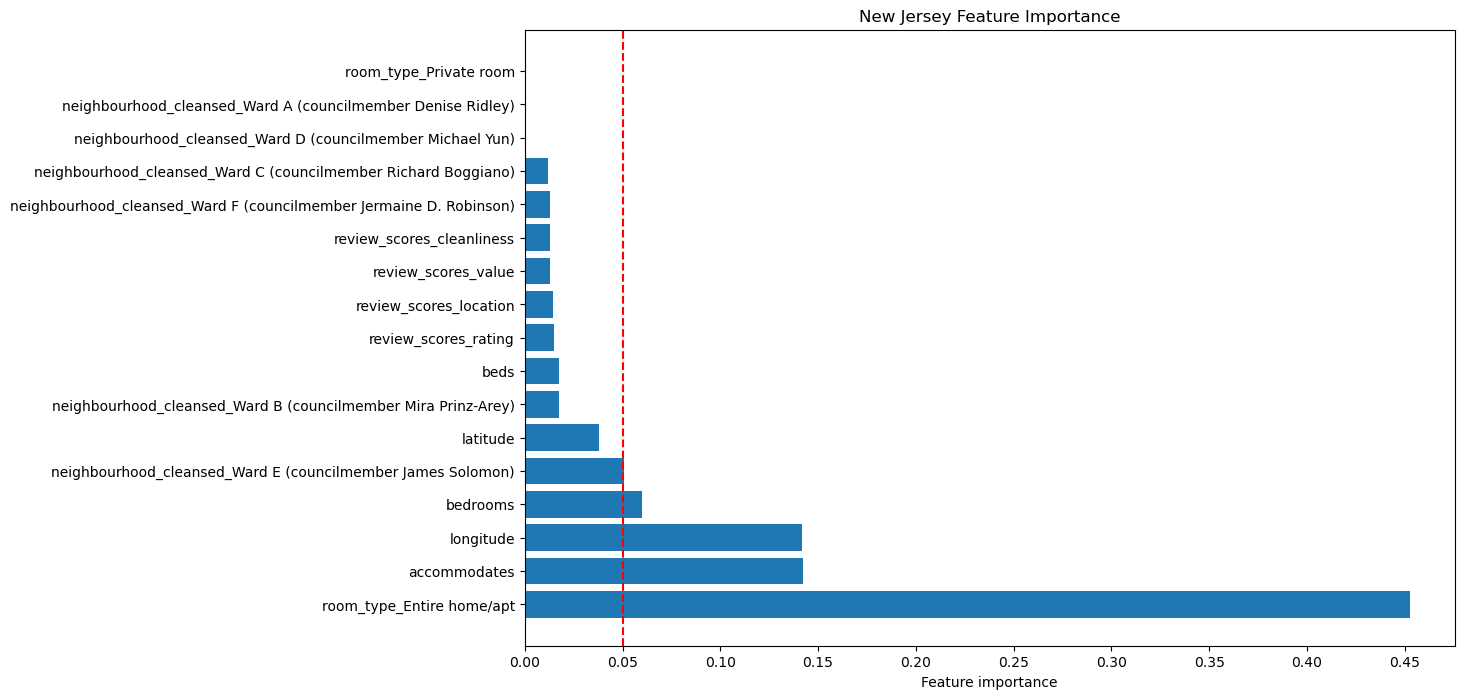

In [206]:
# plot
plt.figure(figsize=(12,8))
plt.barh(jc_feat_df.index, jc_feat_df.importance)
plt.axvline(x = 0.05, color = 'r', label = 'axvline - 0.01', ls='--')
plt.xlabel('Feature importance')
plt.title('New Jersey Feature Importance')
plt.xticks(np.arange(0, 0.5, 0.05))
plt.show()

Rio de Janeiro

In [221]:
rio_feat = rio_model.best_estimator_.named_steps["model"].feature_importances_
cat_enc = rio_model.best_estimator_.named_steps["preprocess"].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()
rio_feat_names = np.concatenate((num_atributes, cat_enc))

In [222]:
rio_feat_df = pd.DataFrame(rio_feat, index = rio_feat_names, columns=["importance"]).sort_values(by = ['importance'], ascending = False)
print(rio_feat_df[rio_feat_df.importance > 0.005])

                                                 importance
bedrooms                                           0.389327
review_scores_location                             0.048338
accommodates                                       0.043924
room_type_Entire home/apt                          0.042317
neighbourhood_cleansed_Copacabana                  0.025526
neighbourhood_cleansed_Joá                         0.024764
review_scores_value                                0.023448
review_scores_rating                               0.019456
review_scores_cleanliness                          0.017726
neighbourhood_cleansed_Barra da Tijuca             0.017369
latitude                                           0.016874
neighbourhood_cleansed_Leblon                      0.016420
neighbourhood_cleansed_Vidigal                     0.013715
neighbourhood_cleansed_São Conrado                 0.013196
neighbourhood_cleansed_Jacarepaguá                 0.012119
neighbourhood_cleansed_Santa Teresa     

In [223]:
rio_feat.sort()
print(rio_feat)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00077036 0.00081812
 0.00082016 0.00087585 0.00091529 0.00101925 0.00102409 0.00103031
 0.00120764 0.00123812 0.0012439  0.00136204 0.00145166 0.00148821
 0.00154114 0.00155398 0.0015680

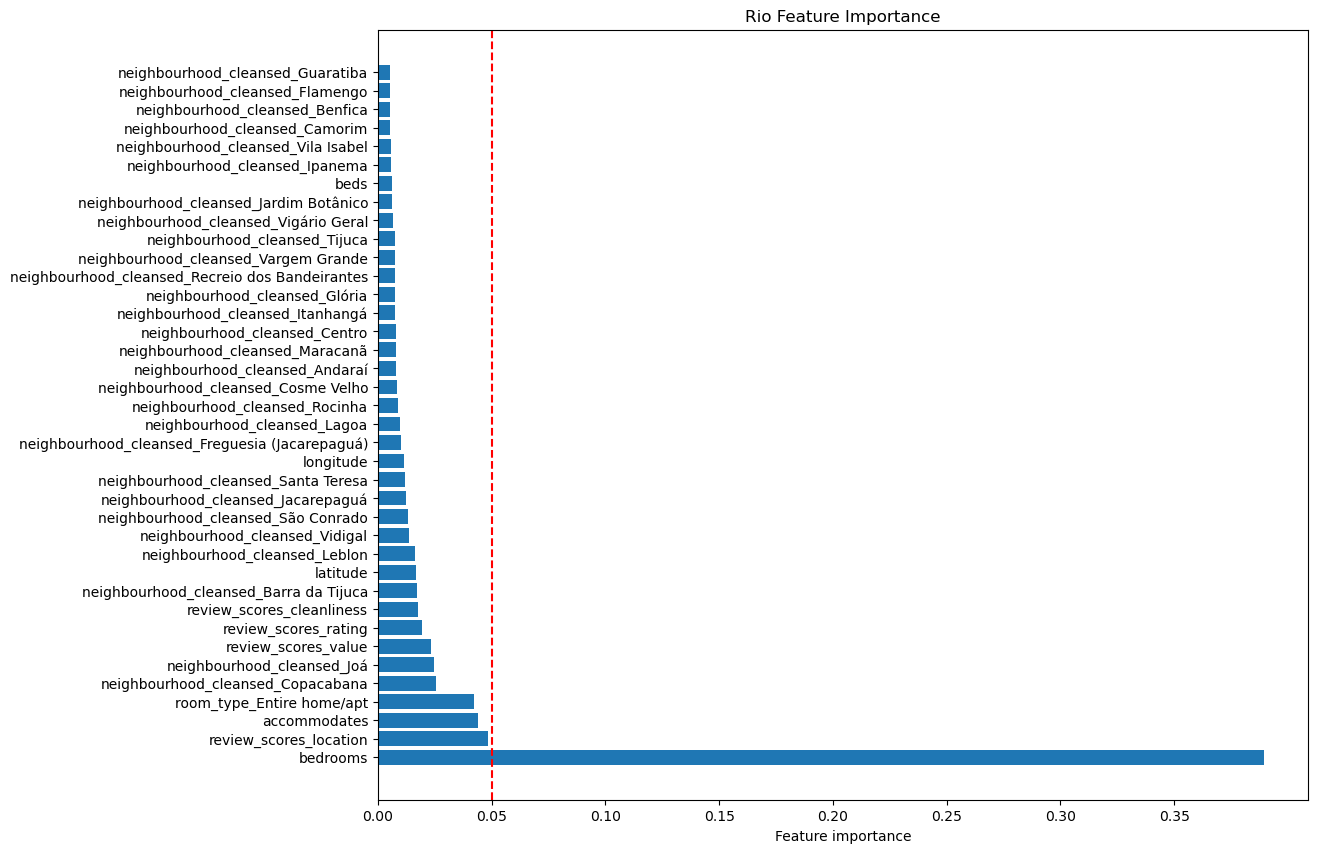

In [225]:
# plot
plt.figure(figsize=(12,10))
rio_filtered = rio_feat_df[rio_feat_df.importance > 0.005]
plt.axvline(x = 0.05, color = 'r', label = 'axvline - 0.01', ls='--')
plt.barh(rio_filtered.index, rio_filtered.importance)
plt.xlabel('Feature importance')
plt.title('Rio Feature Importance')
plt.xticks(np.arange(0, 0.40, 0.05))
plt.show()

New York City

In [192]:
nyc_feat = nyc_model.best_estimator_.named_steps["model"].feature_importances_
cat_enc = nyc_model.best_estimator_.named_steps["preprocess"].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()
nyc_feat_names = np.concatenate((num_atributes, cat_enc))

In [193]:
nyc_feat_df = pd.DataFrame(nyc_feat, index = nyc_feat_names, columns=["importance"]).sort_values(by = ['importance'], ascending = False)
print(nyc_feat_df[nyc_feat_df.importance > 0.005])

                                           importance
room_type_Entire home/apt                    0.300501
accommodates                                 0.051659
bedrooms                                     0.024165
neighbourhood_cleansed_Financial District    0.022269
longitude                                    0.014896
neighbourhood_cleansed_Bayside               0.014611
neighbourhood_cleansed_Long Island City      0.014045
neighbourhood_cleansed_Hell's Kitchen        0.012898
neighbourhood_cleansed_Midtown               0.011153
neighbourhood_cleansed_Williamsburg          0.011055
neighbourhood_cleansed_Tribeca               0.010625
neighbourhood_cleansed_Kips Bay              0.009370
latitude                                     0.009297
neighbourhood_cleansed_Longwood              0.008840
neighbourhood_cleansed_Flatiron District     0.008522
neighbourhood_cleansed_Gramercy              0.008236
neighbourhood_cleansed_Theater District      0.008107
neighbourhood_cleansed_Grant

In [194]:
nyc_feat.sort()
print(nyc_feat)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.575

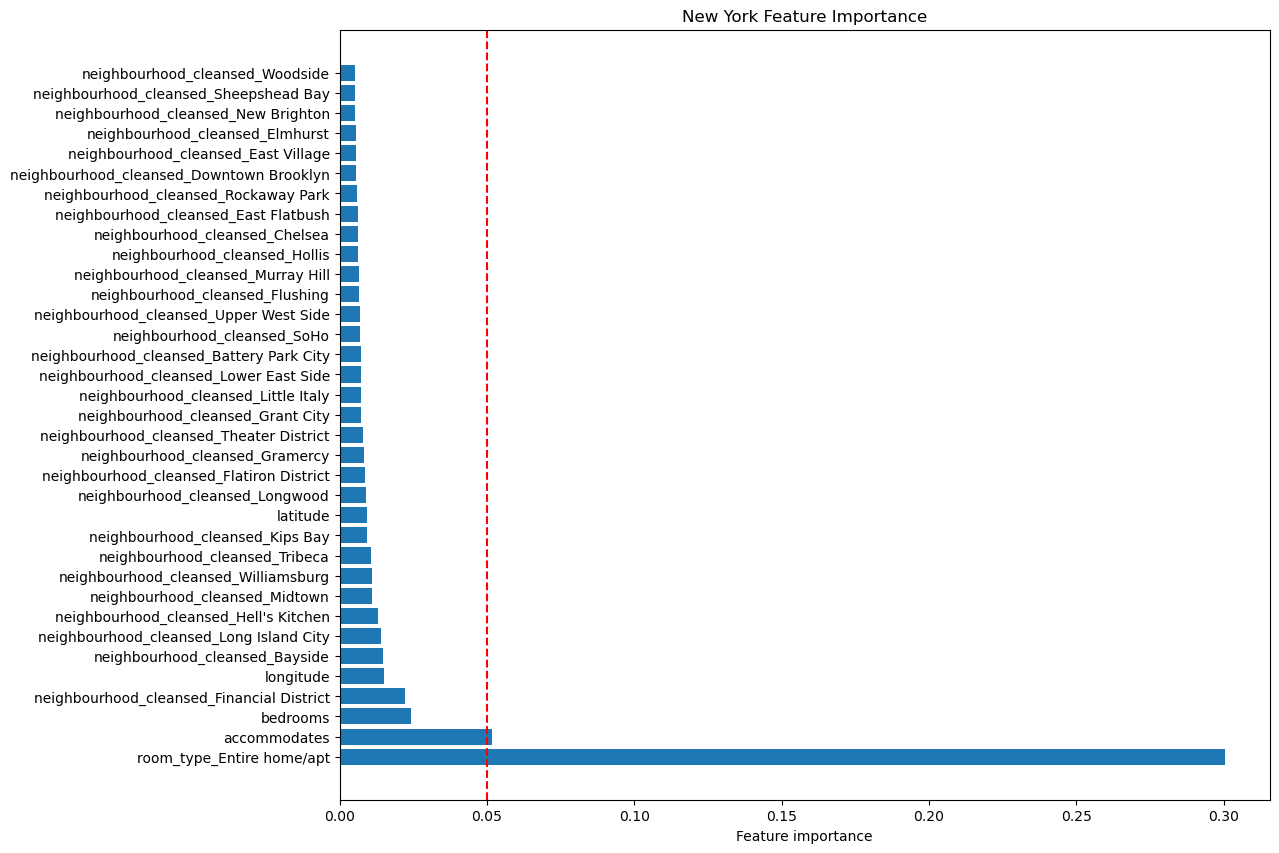

In [212]:
# plot
plt.figure(figsize=(12,10))
nyc_filtered = nyc_feat_df[nyc_feat_df.importance > 0.005]
plt.barh(nyc_filtered.index, nyc_filtered.importance)
plt.axvline(x = 0.05, color = 'r', label = 'axvline - 0.01', ls='--')
plt.xlabel('Feature importance')
plt.title('New York Feature Importance')
plt.show()

## Results discussion and Model insights

The importance of features in Jersey City and New York City is relatively similar. The most important features are room type and the number of people that a listing accommodates. Additionally, the number of bedrooms and longitude are also important features.

Among Jersey City neighborhoods, the Ward E district, which is closest to Manhattan and the easy access to the PATH transportation system, is the most important feature. In New York, the Financial District has the highest feature importance among neighborhoods.

In contrast, Rio has the number of bedrooms and the review score of listing locations as the top two features. The number of people that a listing accommodates and room type are ranked third and fourth in terms of feature importance. For Rio, review score metrics are important and make up the top 10 feature importances. These results are consistent with a city that can be dangerous; therefore, reviews about location, value, overall rating, and cleanliness can be used as a proxy to estimate the safety of the listing and region.

Overall, our tuned model worked better for Jersey City and New York. This may be because there isn't a wide spread of prices within a neighborhood for these cities. In contrast, even a sought-after neighborhood in Rio can have dangerous places, so the price range within Rio neighborhood can be wide.

Including longitude and latitude as features helped model the location of listings. However, for Rio listings, which have unique challenges such as the possibility of stray bullets, spacial regression and spacial indexing might provide a better model.

## Save model object 

In [1]:
import datetime
# JC

jc_model.version = '1.0'
jc_model.pandas_version = pd.__version__
jc_model.numpy_version = np.__version__
jc_model.xgb_version = xgb.__version__
jc_model.X_columns = [col for col in jc_X_train.columns]
jc_model.build_datetime = datetime.datetime.now()

# Rio

rio_model.version = '1.0'
rio_model.pandas_version = pd.__version__
rio_model.numpy_version = np.__version__
rio_model.xgb_version = xgb.__version__
rio_model.X_columns = [col for col in jc_X_train.columns]
rio_model.build_datetime = datetime.datetime.now()

# NYC

nyc_model.version = '1.0'
nyc_model.pandas_version = pd.__version__
nyc_model.numpy_version = np.__version__
nyc_model.xgb_version = xgb.__version__
nyc_model.X_columns = [col for col in jc_X_train.columns]
nyc_model.build_datetime = datetime.datetime.now()

NameError: name 'jc_model' is not defined

In [170]:
# save the model
import joblib
modelpath = '../Data'

joblib.dump(jc_model, modelpath+'jc_model.pkl')
joblib.dump(rio_model, modelpath+'rio_model.pkl')
joblib.dump(nyc_model, modelpath+'nyc_model.pkl')

['../Datanyc_model.pkl']